# Network analysis: Exercises

**Author**: Andrea Ballatore (Birkbeck, University of London)

**Abstract**: Learn how to load, process, analyse, and save a-spatial and spatial network data using Python packages.

## Setup
This is to check that your environment is set up correctly (it should print 'env ok', ignore warnings).

In [1]:
# check environment
import os
print("Conda env:", os.environ['CONDA_DEFAULT_ENV'])
assert os.environ['CONDA_DEFAULT_ENV'] == 'geoprogv1'
# spatial libraries 
import fiona as fi
import geopandas
import pandas as pd
import pysal as sal
import geoplot
import numpy as np
import matplotlib.pyplot as plt
import osmnx
import networkx as nx

# create output folder
if not os.path.exists('tmp'):
    os.makedirs('tmp')

print('env ok')

Conda env: geoprogv1
env ok


-----
## Exercises

When you are in doubt about how a package or a function work, use the Python website (https://docs.python.org/3.9/) and **Google** to find relevant documentation. `networkx` and `osmnx` are the main packages used in these exercises.

Execute the notebook **network_analysis-content.ipynb** before doing these exercises.

### a.

In network science, it is useful to generate synthetic data to simulate different behaviours and properties of networks.
`networkx` can generate many types of networks, including networks that follow the [Barabási–Albert preferential attachment model](https://networkx.org/documentation/stable//reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html).

Vary the parameters in the cells below and see how the resulting networks change.
Based on the graph generators, add a **"small world" graph** (`watts_strogatz_graph`). Look up the documentation and the meaning of the parameters.

In [2]:
def plot_graph_simple(g, title):
    # plot network
    plt.figure()
    # add extra info to the title
    title = title + " • nodes=" + str(len(g.nodes)) + " edges=" + str(len(g.edges))
    plt.title(title)
    nx.draw_spring(g, node_size=50, alpha=.5)
    plt.show()

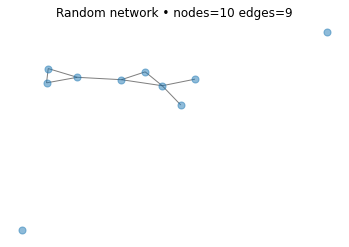

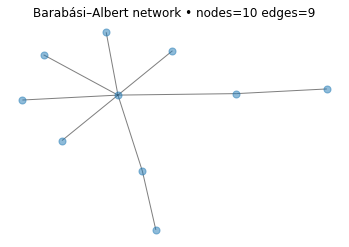

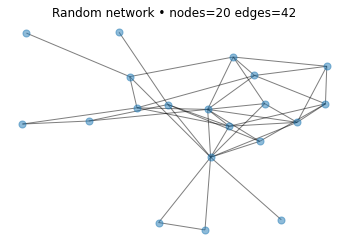

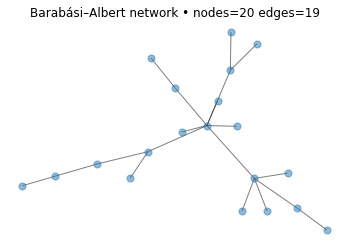

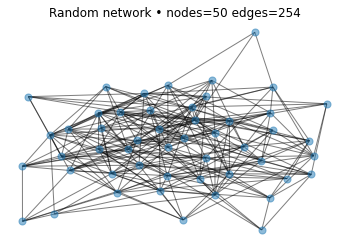

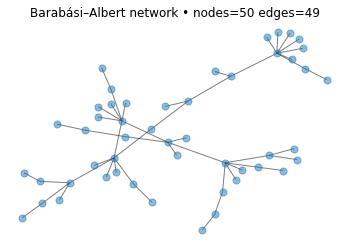

In [3]:
for n_nodes in [10,20,50]:
    # random network
    # probability of edge creation
    prob_edge = .2
    g = nx.gnp_random_graph(n_nodes, prob_edge)
    title = "Random network"
    plot_graph_simple(g, title)
    
    # barabasi network
    # Number of edges to attach from a new node to existing nodes
    m_edges = 1
    g = nx.barabasi_albert_graph(n_nodes, m_edges)
    title = "Barabási–Albert network"
    plot_graph_simple(g, title)

### b.

Use `networkx` to calculate metrics of the three types of networks generated in the previous step, including `nx.density`, `nx.average_shortest_path_length`, `nx.average_degree_connectivity`, `nx.connected_components`. For each metric, read the documentation to see what it means. 
Store the results in a data frame.

In [4]:
# enter your code here

### c.

Researchers have identified a number of [street network types](https://transportgeography.org/contents/chapter8/transportation-urban-form/street_network_types/) that are common in different parts of the world.
Using `osmnx`, retrieve the street network of a small North American city (< 100,000 people) and a city of similar population in Europe and Sub-Saharan Africa. Plot the three networks and inspect them visually.

In [5]:
# enter your code here

### d.

Compare the three street networks retrieved in the previous exercises and through basic network statistics calculated by the package. Insert the indicators in a data frame to facilitate the comparison. 
Do the indicators vary a lot?

In [6]:
# enter your code here

### e.

Origin-Destination (OD) data is used to study flows in transportation networks (see this [introduction](https://cran.r-project.org/web/packages/stplanr/vignettes/stplanr-od.html)).
Using the provided OD data between London bouroughs (Census 2011), create a directed graph with `networkx` with boroughs as nodes and flows as edges.

In [7]:
# download input data
import urllib.request

od_url = "https://github.com/andrea-ballatore/open-geo-data-education/raw/main/datasets/london_travel_origin_destination_2011/greater_london_origin_destination_2011.tsv.gz?raw=true"
od_fname = 'data/london-oa-2011.tsv.gz'
urllib.request.urlretrieve(od_url, od_fname)

('data/london-oa-2011.tsv.gz', <http.client.HTTPMessage at 0x16eb1a790>)

In [8]:
# load tsv into a data frame
od_df = pd.read_csv(od_fname, sep='\t')
len(od_df)
od_df.sample(5)

,geo_code1,geo_code2,all,from_home,light_rail,train,bus,taxi,motorbike,car_driver,car_passenger,bicycle,foot,other,geo_name1,geo_name2,la_1,la_2
237710,E02000699,E02000980,12,0,1,10,0,0,0,1,0,0,0,0,Merton 011,Westminster 021,Merton,Westminster
64366,E02000187,E02000187,139,0,2,1,14,1,0,9,0,2,110,0,Camden 022,Camden 022,Camden,Camden
208222,E02000624,E02000933,5,0,0,5,0,0,0,0,0,0,0,0,Lambeth 007,Wandsworth 011,Lambeth,Wandsworth
58074,E02000167,E02000601,1,0,1,0,0,0,0,0,0,0,0,0,Camden 002,Kingston upon Thames 004,Camden,Kingston upon Thames
328199,E02000946,E02000520,3,0,0,0,0,0,0,3,0,0,0,0,Wandsworth 024,Hillingdon 027,Wandsworth,Hillingdon


In [9]:
# aggregate OD counts by boroughs
borough_od = od_df.groupby(["la_1", "la_2"])[['all','train','bus','car_driver','bicycle']].sum().reset_index()
# see data for flows from all boroughs to the City 
borough_od[borough_od.la_2=='City of London']

,la_1,la_2,all,train,bus,car_driver,bicycle
6,Barking and Dagenham,City of London,2822,1185,86,168,30
40,Barnet,City of London,7990,1824,183,533,139
74,Bexley,City of London,5988,5227,82,316,56
108,Brent,City of London,4500,422,179,195,124
143,Bromley,City of London,9951,8930,112,347,151
178,Camden,City of London,9856,1075,602,272,643
213,City of London,City of London,1506,41,32,8,33
246,Croydon,City of London,6276,5190,267,229,76
280,Ealing,City of London,5098,292,85,231,134
313,Elmbridge,City of London,198,177,0,7,2


In [10]:
# enter your code here

### f.

Calculate the betweeness centrality of boroughs in the OD data using a weighted metric (using the values in `all` as weights). Note that an unweighted analysis would not be meaningful as all boroughs are connected to all other boroughs.

This analysis should reveal to what extent a borough is central to the mobility patterns in Greater London. 
Note that, depending on whether the weight represents either a _cost_ (higher=worse) or an _opportunity_ (higher=better), the values can be inverted using `1/weight`. Experiment with `all` and `inverted_all` to see how the results change.

In [11]:
borough_od['inverted_all'] = 1 / borough_od['all'] 

# enter your code here

### g.

Using the London OD data, generate a plot using the circular layout. Make the thickness of edges proportional to the number of trips (column `all`). As the plot is likely to be too dense, try to prune the network by keeping only edges with `all` above a certain threshold.

In [12]:
print(borough_od['all'].describe())
# get heavier edges
min_threshold = 2288
high_od = borough_od[borough_od['all'] >= min_threshold]
len(high_od)

# enter your code here

count     1188.000000
mean      2464.122054
std       5205.867007
min          1.000000
25%        123.750000
50%        460.500000
75%       2288.000000
max      48412.000000
Name: all, dtype: float64


297

### h.

Transport systems can be intuitively represented as networks. The London Underground network is one of the most famous in the world and can be loaded in `networkx` this way
[(Mark Dunne, 2016)](http://markdunne.github.io/2016/04/10/The-London-Tube-as-a-Graph/):

In [13]:
# load tube input data: edge list 
connections = pd.read_csv('data/london_tube_2015/london_tube_connections.csv')
# node list
stations = pd.read_csv('data/london_tube_2015/london_tube_stations.csv')

# create undirected graph (we assume that a->b is the same as b->a)
g = nx.Graph()

# scan connections and creates nodes and edges
for connection_id, connection in connections.iterrows():
    # get rows with station attributes as dictionaries
    station1 = stations[stations.id == connection['station1']].to_dict('records')[0]
    station2 = stations[stations.id == connection['station2']].to_dict('records')[0]
    # add stations with the attributes
    g.add_node(station1['id'])
    nx.set_node_attributes(g, {station1['id']: station1})
    g.add_node(station2['id'])
    nx.set_node_attributes(g, {station2['id']: station2})
    
    # add connection between stations with their attributes
    g.add_edge(station1['id'], station2['id'], time_min = connection['time'], line_id = connection['line'])

# check and save results in two formats
nx.info(g)
tube_file1 = 'tmp/london_tube_network_2015.graphml'
tube_file2 = 'tmp/london_tube_network_2015.gexf'
nx.write_graphml(g, tube_file1)
nx.write_gexf(g, tube_file2)
print("graph saved in",tube_file1,"and",tube_file2)

graph saved in tmp/london_tube_network_2015.graphml and tmp/london_tube_network_2015.gexf


Using network analysis concepts on the Tube network:
- Calculate basic network metrics of the tube. 
- Calculate at least two measures of centrality of the stations using the `time_min` (travel time in minutes) attribute as weights. 
- Try to plot the network changing the colour of nodes based on centrality. 
- Try to identify "communities" of stations that are highly interconnected.

In [14]:
tube_g = nx.read_graphml(tube_file)
print(nx.info(tube_g))
# plot network a-spatially (not using geolocations)
nx.draw_spring(g, node_size=10, alpha=.5)

# insert your code here

NameError: name 'tube_file' is not defined

End of notebook